<a href="https://colab.research.google.com/github/LuisCGit/mit_bitcoinexpo_hackathon/blob/main/StacksApi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [53]:
import requests
import json
import pandas as pd
import pickle
from scipy.stats import expon, gamma
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
url = 'https://stacks-node-api.mainnet.stacks.co/extended/v1/tokens/ft/metadata'
request_params = {
    'limit' : 5,
    'offset' : 10
}
resp = requests.get(url,
             params = request_params
             )

In [ ]:
resp.json()

{'limit': 5,
 'offset': 10,
 'results': [{'contract_id': 'SP1JSH2FPE8BWNTP228YZ1AZZ0HE0064PS6RXRAY4.fpwr-v04',
   'decimals': 8,
   'description': '',
   'image_canonical_uri': '',
   'image_uri': '',
   'name': 'Friedger Pool wrapped rewards',
   'sender_address': 'SP1JSH2FPE8BWNTP228YZ1AZZ0HE0064PS6RXRAY4',
   'symbol': 'FPWR',
   'token_uri': 'https://pool.friedger.de/wrapped-rewards.json',
   'tx_id': '0x66d0a9b78f420932e311bae62cab389b8f4a6faa3764801acd2f3c4760a29035'},
  {'contract_id': 'SPN4Y5QPGQA8882ZXW90ADC2DHYXMSTN8VAR8C3X.friedger-token-v1',
   'decimals': 0,
   'description': '',
   'image_canonical_uri': '',
   'image_uri': '',
   'name': '',
   'sender_address': 'SPN4Y5QPGQA8882ZXW90ADC2DHYXMSTN8VAR8C3X',
   'symbol': '',
   'token_uri': '',
   'tx_id': '0xae15214bf3317cf3ca17726f02ea7cdeb51e096febcff215c1ede36a34415375'},
  {'contract_id': 'SP1FV3SN48RVHHQF7456N62G5NW768B8YM44M3AV1.jose-token-v1',
   'decimals': 8,
   'description': '',
   'image_canonical_uri': '',
   

In [94]:
all_contracts_url = 'https://api.stacksdata.info/nft/contracts'
resp = requests.get(all_contracts_url).json()

In [ ]:
contractId = 'SP1FV3SN48RVHHQF7456N62G5NW768B8YM44M3AV1.doge-punks-v1' #resp[90]['contractName'].split('.')[0]
#hiro api
#url_contract = f'https://stacks-node-api.mainnet.stacks.co/extended/v1/tokens/{contractId}/ft/metadata'
#stacks.info api
url_contract = f'https://api.stacksdata.info/nft/contracts/SP2X0TZ59D5SZ8ACQ6YMCHHNR2ZN51Z32E2CJ173.the-explorer-guild/transactions'
resp_contract = requests.get(url_contract)
# contrac_request_params = {
    
# }

In [ ]:
#Hiro, Retrieves details of a contract with a given contract_id
url_info = 'https://stacks-node-api.mainnet.stacks.co/extended/v1/contract/SP2X0TZ59D5SZ8ACQ6YMCHHNR2ZN51Z32E2CJ173.the-explorer-guild'
resp_info = requests.get(url_info)
resp_info.json()

{'abi': '{"maps":[{"key":"uint128","name":"chosen-ids","value":"uint128"},{"key":"bool","name":"mint-address","value":"principal"}],"functions":[{"args":[],"name":"called-from-mint","access":"private","outputs":{"type":"bool"}},{"args":[{"name":"remaining-ids","type":"uint128"}],"name":"cycle-random-id","access":"private","outputs":{"type":{"response":{"ok":"uint128","error":"uint128"}}}},{"args":[{"name":"byte-idx","type":"uint128"}],"name":"rand","access":"private","outputs":{"type":"uint128"}},{"args":[],"name":"set-vrf","access":"private","outputs":{"type":"bool"}},{"args":[{"name":"id","type":"uint128"},{"name":"idx","type":"uint128"},{"name":"ids-remaining","type":"uint128"}],"name":"swap-container","access":"private","outputs":{"type":"bool"}},{"args":[],"name":"freeze-metadata","access":"public","outputs":{"type":{"response":{"ok":"bool","error":"uint128"}}}},{"args":[{"name":"new-owner","type":"principal"},{"name":"promo","type":"bool"}],"name":"mint","access":"public","output

In [ ]:
meta_url = 'https://stacks-node-api.mainnet.stacks.co/extended/v1/tokens/SP2X0TZ59D5SZ8ACQ6YMCHHNR2ZN51Z32E2CJ173/ft/metadata'
meta_url = 'https://stacks-node-api.mainnet.stacks.co/extended/v1/tokens/SP2X0TZ59D5SZ8ACQ6YMCHHNR2ZN51Z32E2CJ173.the-explorer-guild/nft/metadata'

In [ ]:
resp_meta = requests.get(meta_url)

In [ ]:
resp_meta.json()

{'error': 'NFT metadata processing is not enabled on this server'}

In [ ]:
all_meta = 'https://stacks-node-api.mainnet.stacks.co/extended/v1/tokens/nft/metadata'
resp_meta_all = requests.get(all_meta)

In [ ]:
resp_meta_all.json()

{'error': 'NFT metadata processing is not enabled on this server'}

In [ ]:
#hiro, events
events = 'https://stacks-node-api.mainnet.stacks.co/extended/v1/contract/SP2X0TZ59D5SZ8ACQ6YMCHHNR2ZN51Z32E2CJ173/events'
params = {'limit' : 50}
resp_events= requests.get(events, params = params)

In [ ]:
resp_events.json()

{'limit': 50, 'offset': 0, 'results': []}

## StacksData API, transactions

In [ ]:
params_fun = {
    'function_name' : 'get-token-uri',
    'contract_address' : 'SP2X0TZ59D5SZ8ACQ6YMCHHNR2ZN51Z32E2CJ173',
#    'contract_name' : 'the-explorer-guild'
}
url_fun = 'https://stacks-node-api.mainnet.stacks.co/v2/contracts/call-read'
resp_fun = requests.post(url_fun, data = params_fun)

In [ ]:
resp_fun.status_code

400

In [ ]:
url = 'https://api.stacksdata.info/nft/contracts/{contract}/tokens'


In [96]:
all_contracts = [x['contractName'] for x in resp]

In [ ]:
ex = all_contracts[0]

In [ ]:
params_vol = {
    'contract' : ex,
}
url_vol = 'https://api.stacksdata.info/nft/contracts/SP3S8FAWKQ7NCKMJ6729B8KJJ6JYRE2EY5YVK4R55.dragonouns/volume'
resp_vol = requests.get(url_vol)

In [106]:
transaction_feats = []
for i, contract in enumerate(all_contracts):
  print("index: ", i)
  datadict = {'contract' : contract}
  url_vol = 'https://api.stacksdata.info/nft/contracts/' + contract + '/volume'
  try:
    resp_vol = requests.get(url_vol).json()
  except:
    continue
  if len(resp_vol) > 0:
    df = pd.DataFrame(resp_vol)
    df['period'] = pd.to_datetime(df['period'])
    df = df.sort_values('period')
    avg = df['volume'][-14:].mean()
    datadict['avg_vol_14'] = avg 
  else:
    datadict['avg_vol_14'] = 0
  
  url_trans = 'https://api.stacksdata.info/nft/contracts/' + contract + '/transactions'
  try:
    resp_trans = requests.get(url_trans).json()
  except:
    continue
  if len(resp_trans) > 0:
    df = pd.DataFrame(resp_trans)
    df['period'] = pd.to_datetime(df['period'])
    df = df.sort_values('period')
    avg = df['transactions'][-14:].mean()
    datadict['avg_transactions_14'] = avg 
  else:
    datadict['avg_transactions_14'] = 0
  
  url_owners = 'https://api.stacksdata.info/nft/contracts/' + contract + '/transactions'
  try:
    resp_owner = requests.get(url_owners).json()
  except:
    continue
  datadict['num_owners'] = len(resp_owner)

  url_floor = '  https://api.stacksdata.info/nft/contracts/' + contract + '/floor'
  try:
    resp_floor = requests.get(url_floor).json()
  except:
    continue
  if len(resp_floor) > 0:
    df = pd.DataFrame(resp_floor)
    print(df.head())
    df['date'] = pd.to_datetime(df['date'])
    df = df.sort_values('date')
    avg = df['floor'][-14:].mean()
    datadict['avg_floor_14'] = avg 
  else:
    datadict['avg_floor_14'] = 0
  transaction_feats.append(datadict)
transaction_feats = pd.DataFrame(transaction_feats)

index:  0
index:  1
index:  2
index:  3
index:  4
index:  5
index:  6
index:  7
index:  8
index:  9
index:  10
index:  11
index:  12
index:  13
index:  14
index:  15
index:  16
index:  17
index:  18
index:  19
index:  20
index:  21
index:  22
index:  23
index:  24
index:  25
index:  26
index:  27
index:  28
index:  29
index:  30
index:  31
index:  32
index:  33
here
index:  34
index:  35
index:  36
index:  37
index:  38
index:  39
index:  40
index:  41
index:  42
index:  43
index:  44
index:  45
index:  46
index:  47
index:  48
index:  49
index:  50
index:  51
index:  52
index:  53
index:  54
index:  55
index:  56
index:  57
index:  58
index:  59
index:  60
index:  61
index:  62
index:  63
index:  64
index:  65
index:  66
index:  67
index:  68
index:  69
index:  70
index:  71
index:  72
index:  73
index:  74
index:  75
index:  76
index:  77
index:  78
index:  79
index:  80
index:  81
index:  82
index:  83
index:  84
index:  85
index:  86
index:  87
index:  88
index:  89
index:  90
inde

In [108]:
transaction_feats.shape

(48, 5)

In [ ]:
transaction_feats.to_csv('transact_feats.csv')

In [ ]:
for contract in all_contracts:
  url_vol = 'https://api.stacksdata.info/nft/contracts/' + contract + '/volume'
  try:
    resp_vol = requests.get(url_vol).json()
  except:
    continue
  if len(resp_vol) > 0:
    df = pd.DataFrame(resp_vol)
    df['period'] = pd.to_datetime(df['period'])
    df = df.sort_values('period')
    avg = df['volume'][-14:].mean()
    print(avg)

## Token level features

In [ ]:
contr = 'SP2CV06TQ8B5NXKM6E66VCKYCS9FFDGEB8ZPK6JMR.citycats-nft'
token_url = 'https://api.stacksdata.info/nft/contracts/' + contr  + '/tokens/9'
token_resp = requests.get(token_url)

In [ ]:
token_resp.json()

{'code': '404', 'message': 'Unknown token'}

In [ ]:
transaction_feats[transaction_feats['num_owners'] > 0]

,contract,avg_vol_14,avg_transactions_14,num_owners
4,SPXGFH9JTKPF2TQZJ2AH7NSMMMXJ72VMGH8PR654.dyle0...,0.0,1.000000,1
14,SP1GWHGESCF29TV10Q6X0VZYWH4QJ6CM9NK6DSH9J.orie...,0.0,2.000000,1
17,SP3ZMEFW7VH796ZQAH1JMAJT4WC4VPEZZFB6W5CAD.sket...,360.0,1.000000,2
21,SP2SC0EAWCRKC597KMEBJ52TEHFSQAV4ZCXJD5J1Y.mars...,0.0,2.000000,2
23,SP23FCMK31M19E0NNRQ8BXZK0J3KMWF2Q4WMGJJQ2.punk...,0.0,4.000000,1
...,...,...,...,...
879,SP3QSAJQ4EA8WXEDSRRKMZZ29NH91VZ6C5X88FGZQ.ruma-v1,0.0,1.785714,18
882,SP3QSAJQ4EA8WXEDSRRKMZZ29NH91VZ6C5X88FGZQ.this...,30.0,1.928571,183
883,SPHSC0CQC585RT86XBVYRBJ0HQC44VGQ83DH3AM8.XXXte...,0.0,1.000000,1
886,SP497E7RX3233ATBS2AB9G4WTHB63X5PBSP5VGAQ.boomb...,0.0,6.250000,4


In [ ]:
for contract in all_contracts:
  contract_info_url = 'https://stacks-node-api.mainnet.stacks.co/extended/v1/contract/' + contract + '/events'
  resp_info_url = requests.get(contract_info_url).json()
  for res in resp_info_url['results']:
    print(res['event_type'])


smart_contract_log
smart_contract_log
smart_contract_log
smart_contract_log
smart_contract_log
smart_contract_log
smart_contract_log
smart_contract_log
smart_contract_log
smart_contract_log
smart_contract_log
smart_contract_log
smart_contract_log
smart_contract_log
smart_contract_log
smart_contract_log
smart_contract_log
smart_contract_log
smart_contract_log
smart_contract_log
smart_contract_log
smart_contract_log
smart_contract_log
smart_contract_log
smart_contract_log
smart_contract_log
smart_contract_log
smart_contract_log
smart_contract_log
smart_contract_log
smart_contract_log
smart_contract_log
smart_contract_log
smart_contract_log
smart_contract_log
smart_contract_log
smart_contract_log
smart_contract_log
smart_contract_log
smart_contract_log
smart_contract_log
smart_contract_log
smart_contract_log
smart_contract_log
smart_contract_log
smart_contract_log
smart_contract_log
smart_contract_log
smart_contract_log
smart_contract_log
smart_contract_log
smart_contract_log
smart_contra

KeyboardInterrupt: ignored

In [110]:
df = pd.read_csv('transact_feats.csv')

In [111]:
df.head()

,Unnamed: 0,contract,avg_vol_14,avg_transactions_14,num_owners
0,0,SP3S8FAWKQ7NCKMJ6729B8KJJ6JYRE2EY5YVK4R55.drag...,0.0,0.0,0
1,1,SP1YB7QMVYXN4SSP4WSMMG7XEZ56TVF7YN98RSE36.meta...,0.0,0.0,0
2,2,SPV0WDJQHWJVR2XD59H5NGX9AMNNTP4Q92XV77JD.songs...,0.0,0.0,0
3,3,SP1QK1AZ24R132C0D84EEQ8Y2JDHARDR58R72E1ZW.boom...,0.0,0.0,0
4,4,SPXGFH9JTKPF2TQZJ2AH7NSMMMXJ72VMGH8PR654.dyle0...,0.0,1.0,1


In [25]:
data = df['avg_transactions_14']
data = data[data > 0]

In [50]:
loc, scale = expon.fit(data, floc=0)

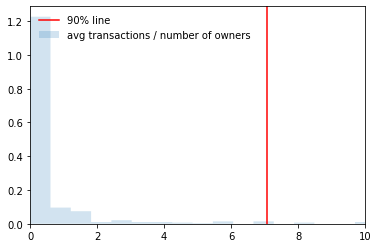

In [113]:
data_ratio = [ v / o for v, o in zip(df['avg_vol_14'], df['num_owners']) if o > 0]
fig, ax = plt.subplots(1, 1)
ax.hist(data_ratio, density=True, histtype='stepfilled', alpha=0.2, bins=1000, label = "avg transactions / number of owners")
ax.axvline(x = sorted(data_ratio)[int(0.9*len(data_ratio))], color = 'red', label = "90% line")
ax.legend(loc='best', frameon=False)
ax.set_xlim([0,10])
plt.show()

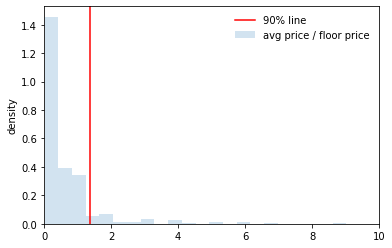

In [120]:
data_ratio = [ v / o for v, o in zip(df['avg_transactions_14'], df['num_owners']) if o > 0]
fig, ax = plt.subplots(1, 1)
ax.hist(data_ratio, density=True, histtype='stepfilled', alpha=0.2, bins=100, label = "avg price / floor price")
ax.axvline(x = sorted(data_ratio)[int(0.9*len(data_ratio))], color = 'red', label = "90% line")
ax.legend(loc='best', frameon=False)
ax.set_xlim([0,10])
plt.ylabel("density")
plt.savefig("histogram.pdf")

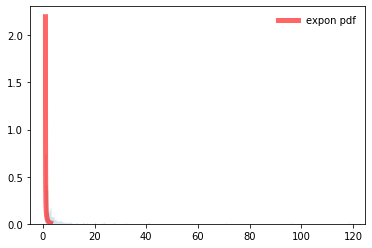

In [64]:
fig, ax = plt.subplots(1, 1)
x = np.linspace(gamma.ppf(0.01,a = a, loc = loc, scale = scale),
                gamma.ppf(0.99,a=a, loc = loc, scale = scale), 100)
ax.plot(x, gamma.pdf(x, a = a, loc = loc, scale = scale),
       'r-', lw=5, alpha=0.6, label='expon pdf')
ax.hist(data, density=True, histtype='stepfilled', alpha=0.2, bins=300)
ax.legend(loc='best', frameon=False)
ax.set_xlim([-5,20])
plt.show()